In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [106]:
df = pd.read_csv('../input/headlines.csv', header=None)
df

,0
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...
...,...
2220,India opens skies to competition\n \n India wi...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...
2222,Survey confirms property slowdown\n \n Governm...
2223,High fuel prices hit BA's profits\n \n British...


Data preprocesing

In [107]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer


In [108]:
swords = stopwords.words('english')
wnl = WordNetLemmatizer()

In [109]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalpha()]
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]

    return tokens3



In [110]:
sent = 'It was expected to be raining today. But not completed.'
clean_text(sent)

['expected', 'raining', 'today', 'completed']

In [111]:
pos_tag(['tested'])[0][1]

'VBN'

In [112]:
# adding lemmatization

def lemmatize(word):
    tag = pos_tag([word])
    pos = 'n'
    wnl = WordNetLemmatizer()
    if tag[0][1].startswith('N'):
        pos = 'n'
    elif tag[0][1].startswith('V'):
        pos = 'v'
    elif tag[0][1].startswith('J'):
        pos = 'a'
    elif tag[0][1].startswith('R'):
        pos = 'r'

    return (wnl.lemmatize(word, pos=pos))

In [113]:
swords.extend(['said', 'say', 'made', 'make', 'new', 'one', 'u'])

In [114]:
def clean_text(sent):
    tokens1 = word_tokenize(sent)
    tokens2 = [token for token in tokens1 if token.isalpha()]
    tokens3 = [token.lower() for token in tokens2 if token.lower() not in swords]
    tokens4 = [lemmatize(token) for token in tokens3]

    return tokens4



In [115]:
clean_text(sent)

['expect', 'rain', 'today', 'complete']

In [116]:
cleaned_text = df[0].apply(clean_text)
cleaned_text

0       [budget, set, scene, election, gordon, brown, ...
1       [army, chief, regiment, decision, military, ch...
2       [howard, denies, split, id, card, michael, how...
3       [observer, monitor, uk, election, minister, in...
4       [kilroy, name, election, seat, target, show, h...
                              ...                        
2220    [india, open, sky, competition, india, allow, ...
2221    [yukos, bankruptcy, u, matter, russian, author...
2222    [survey, confirms, property, slowdown, governm...
2223    [high, fuel, price, hit, ba, profit, british, ...
2224    [u, trade, gap, hit, record, gap, u, export, i...
Name: 0, Length: 2225, dtype: object

In [117]:
final_text = ' '.join(cleaned_text.sum())

In [118]:
from wordcloud import WordCloud
wc = WordCloud(background_color='black').generate(final_text)

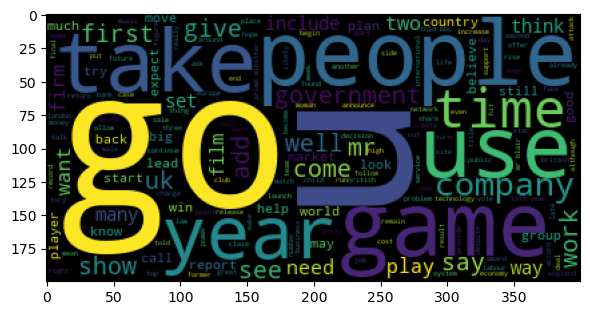

In [119]:
plt.figure(figsize=(6,9))
plt.imshow(wc)
plt.tight_layout()

remove common words (add them to stopwords)   -> done

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [121]:
tfidf = TfidfVectorizer(analyzer=clean_text)


In [122]:
x_new = tfidf.fit_transform(df[0])

In [123]:
x_new.shape

(2225, 21406)

kneed library finds knee

In [124]:
# pip install kneed

create the clusters

In [125]:
from sklearn.cluster import KMeans

In [126]:
sse = []
for k in range(1, 16):
    km = KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit_predict(x_new)
    sse.append(km.inertia_) # inertia has sum of squares value and we plot it

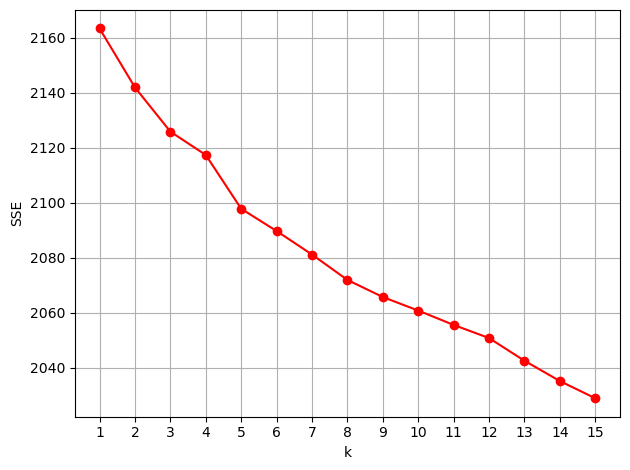

In [127]:
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1, 16))
plt.plot(range(1, 16), sse, marker='o', color='r')
plt.tight_layout()

In [128]:
from kneed import KneeLocator


In [130]:
kl = KneeLocator(range(1, 16), sse, curve='convex', direction='decreasing')
kl.elbow

np.int64(5)

In [131]:
km = KMeans(n_clusters=5, random_state=0, n_init='auto')

In [132]:
labels = km.fit_predict(x_new)

In [133]:
labels

array([4, 3, 4, ..., 3, 3, 3], shape=(2225,), dtype=int32)

In [144]:
cleaned_df = pd.DataFrame({'words':cleaned_text, 'label':labels})

In [145]:
cleaned_df

,words,label
0,"[budget, set, scene, election, gordon, brown, ...",4
1,"[army, chief, regiment, decision, military, ch...",3
2,"[howard, denies, split, id, card, michael, how...",4
3,"[observer, monitor, uk, election, minister, in...",4
4,"[kilroy, name, election, seat, target, show, h...",4
...,...,...
2220,"[india, open, sky, competition, india, allow, ...",3
2221,"[yukos, bankruptcy, u, matter, russian, author...",3
2222,"[survey, confirms, property, slowdown, governm...",3
2223,"[high, fuel, price, hit, ba, profit, british, ...",3


In [155]:
from nltk import FreqDist

In [164]:
def wclabel():
    label = input('Enter label: ')
    if label == '0':
        data = cleaned_df[cleaned_df['label'] == 0]['words'].sum()
        text = ' '.join(data)
    elif label == '1':
        data = cleaned_df[cleaned_df['label'] == 1]['words'].sum()
        text = ' '.join(data)
    elif label == '2':
        data = cleaned_df[cleaned_df['label'] == 2]['words'].sum()
        text = ' '.join(data)
    elif label == '3':
        data = cleaned_df[cleaned_df['label'] == 3]['words'].sum()
        text = ' '.join(data)
    elif label == '4':
        data = cleaned_df[cleaned_df['label'] == 4]['words'].sum()
        text = ' '.join(data)

    
    wcloud = WordCloud(background_color='white').generate(text)

    freq = FreqDist(data)
    print(freq.most_common(10))

    plt.imshow(wcloud)
    plt.title(f'WordCloud for label {label}')

    

[('year', 1114), ('u', 952), ('mr', 848), ('would', 762), ('company', 681), ('also', 597), ('firm', 579), ('government', 574), ('market', 534), ('last', 462)]


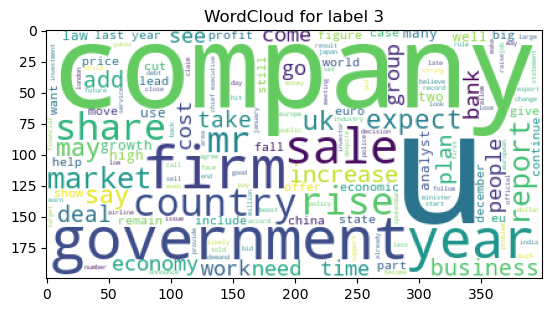

In [165]:
wclabel()

In [166]:
new = "US Will Permanently Pause Migration From All '3rd World Countries': Trump"

new = tfidf.transform([new])

In [167]:
km.predict(new)

array([3], dtype=int32)